In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris_load = datasets.load_iris()
# iris = pd.DataFrame(data=iris_load.data, columns=iris_load.feature_names)

iris = pd.DataFrame(data=iris_load.data, columns=iris_load.feature_names)
iris['Species'] = pd.Categorical.from_codes(iris_load.target, iris_load.target_names)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data = { "weight": [4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 
                    5.14, 4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69, 
                    6.31, 5.12, 5.54, 5.50, 5.37, 5.29, 4.92, 6.15, 5.80, 5.26]
                    , "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10}

PlantGrowth = pd.DataFrame(data)

In [4]:
PlantGrowth.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


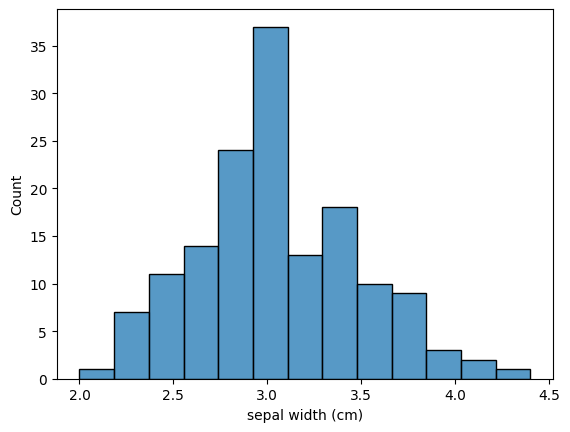

In [5]:
#1a.
sns.histplot(x='sepal width (cm)', data=iris)
plt.show()

1b. I would expect the mean to be slightly higher than the median due to the graph being right skewed. 

In [6]:
iris.describe()
#1C. We see the mean is 3.06 and the median is 3.0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1D. 2.8

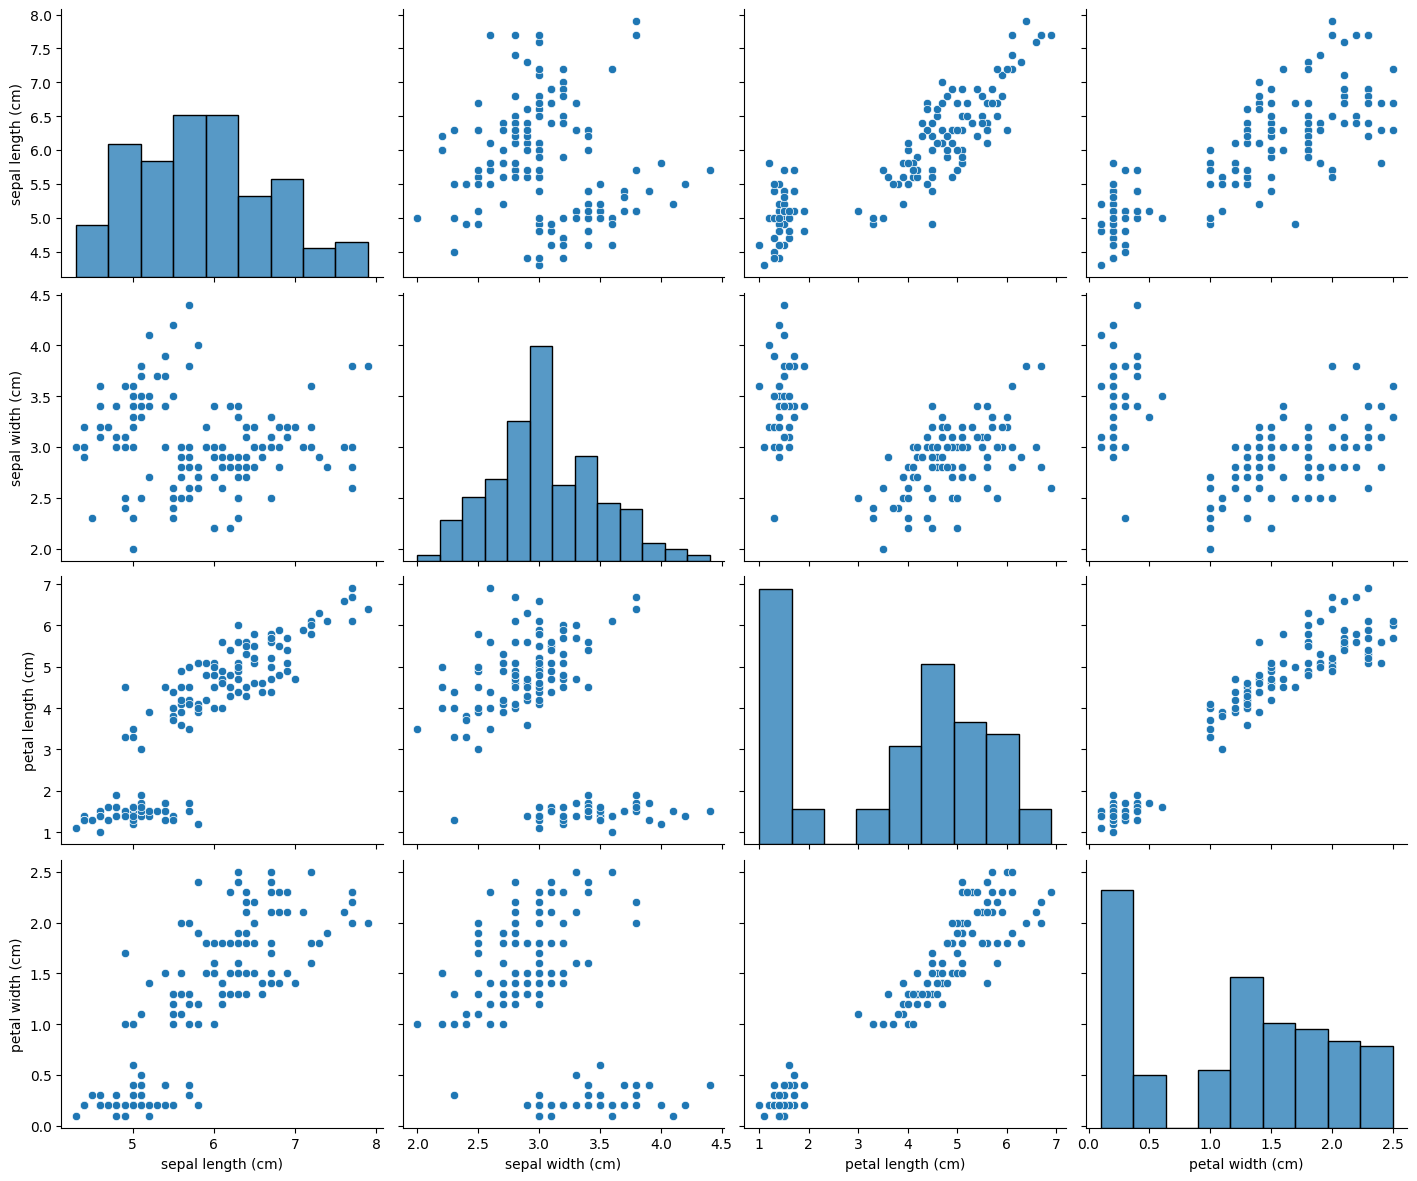

In [7]:
#1E
sns.pairplot(iris, height=3, aspect=1.2)


1F. It appears that petal length and petal width have the strongest relationship whereas sepal width and petal length have the weakest. 

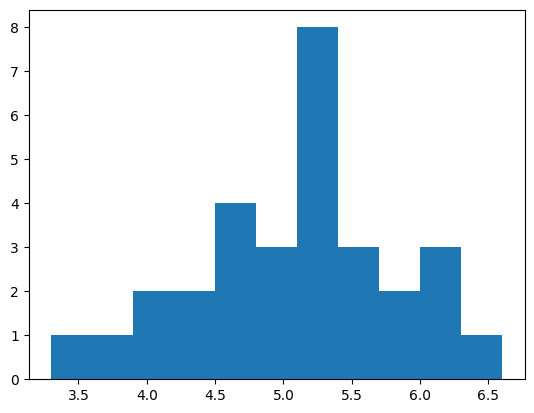

In [8]:
#2A.
bin_edges = [3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6.0, 6.3, 6.6]
plt.hist(x=PlantGrowth['weight'], bins=bin_edges)
plt.show()

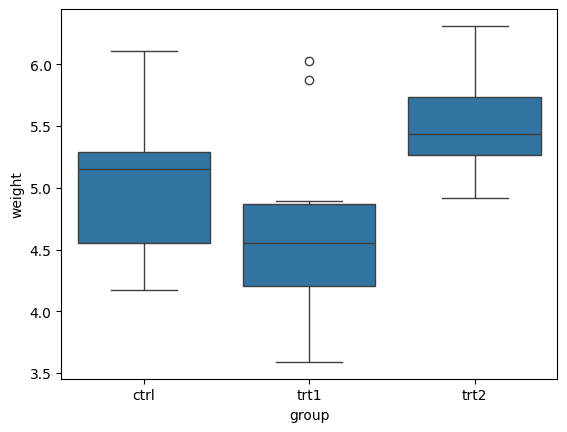

In [9]:
#2B
sns.boxplot(data=PlantGrowth, x='group', y='weight')
plt.show()

2C. Based on the boxplot, I would say between 95-98% of weights are below trt2

In [10]:
#2D
min_trt2 = PlantGrowth[PlantGrowth['group']=='trt2']['weight'].min()
trt1 = PlantGrowth[PlantGrowth['group']=='trt1']['weight']

percent_below = float((trt1 < min_trt2).sum() / len(trt1) * 100)
percent_below

80.0

/var/folders/c8/5t9shnnx55s9qks08wcp_zp40000gn/T/ipykernel_6864/2782251643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weight_above, x='group', y='weight', palette='Set2')


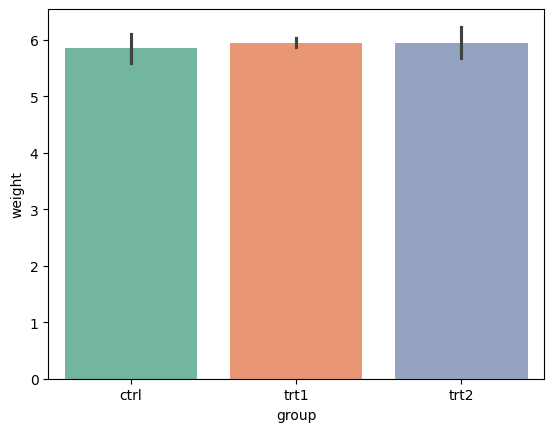

In [11]:
#2E
weight_above = PlantGrowth[PlantGrowth['weight']> 5.5]
sns.barplot(data=weight_above, x='group', y='weight', palette='Set2')
plt.show()